# IECR

In [15]:
import os
os.chdir(r"C:\Users\Trisha\Desktop\EL")
cwd = os.getcwd()
print(cwd)

import numpy as np
from datetime import datetime
from selenium import webdriver
# from chromedriver_py import binary_path # this will get you the path variable
from bs4 import BeautifulSoup
import pandas as pd 

C:\Users\Trisha\Desktop\EL


In [ ]:
driver = webdriver.Firefox()

url = 'https://pubs.acs.org/loi/iecred'
driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
content = driver.page_source
soup = BeautifulSoup(content)
links = list();
for issue in soup.findAll('li',attrs={'class':"col-md-4 col-xs-12"}):
    link=(issue.find('a'))
    links.append(link.get('href'))
    
driver.close()   

In [141]:
driver = webdriver.Firefox()

doi = list(); authors = list(); journal  = list(); Dates = list(); Abs = list();
ArtType = list(); topics = list(); volume = list(); Issue = list(); 
ArtGenre = list(); 
# FirstAuthor = list(); SecondAuthor=list(); 
nAuthors = list(); CorrespAuthor = list()

siteName = "https://pubs.acs.org"
for volIssue in links[-148:]:
    url = siteName+volIssue
    driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
    content = driver.page_source
    soup = BeautifulSoup(content)
    
    for art in soup.findAll('div',attrs={'class':"issue-item clearfix"}):    
        link=(art.find('a'))    
        title = (art.find('h5', attrs={'class':"issue-item_title"}).text)
        name = art.findAll('span',attrs={'class':"hlFld-ContribAuthor"})
        vol = art.find('span',attrs={'class':"issue-item_vol-num"})
        iss = art.find('span',attrs={'class':"issue-item_issue-num"})
        jour = 'IECR'
        date = art.find('span',attrs={'class':"pub-date-value"})
        date = datetime.strptime(date.text, '%B %d, %Y').date()
        absF = (art.find('span',attrs={'class':"hlFld-Abstract"}))
        atype = art.findAll('span',attrs={'class':"issue-item_type"})
        if art.find_previous_sibling('h6'):
            genre = art.find_previous_sibling('h6').text
        else:
            genre = 'NA'

        if absF:
            abstract = absF.find('p')
            Abs.append(abstract.text)
        else:
            Abs.append('NA')

        auth = list()
        if name:
            for ai in name:
                auth.append(ai.text)
        else:
            auth.append('NA')

        for ai in atype:
            if ai.text:
                ArtType.append(ai.text.strip(" ()"))

        authors.append(auth)
        doi.append(link.get('href').strip('/doi/'))
        journal.append(jour)
        Dates.append(date)
    #     ArtType.append(atype.text)
        topics.append(title)
        volume.append(int(vol.text))
        Issue.append(int(iss.text))
        ArtGenre.append(genre)
#         FirstAuthor.append(auth[0])
#         if len(auth) > 1:
#             SecondAuthor.append(auth[1])
#         else:
#             SecondAuthor.append('NA')
        CorrespAuthor.append(auth[-1])
        nAuthors.append(len(auth))

driver.close()   

In [ ]:
# df = pd.DataFrame({'Category':ArtGenre,'Corresponding Author':CorrespAuthor,'#Authors':nAuthors,'Title':topics,
#                     'Date':Dates,'Journal':journal,'Volume':volume,'Issue':Issue,
#                     'Abstract':Abs,'DOI':doi,'Authors':authors,'Type':ArtType}) 
# df.to_csv('IECR_articles.csv', index=False, encoding='utf-8')

In [216]:
df = pd.read_csv('IECR_articles.csv')

In [228]:
a = 'abcd '
print(a[0])

a


In [ ]:
import matplotlib.pyplot as plt

s = pd.value_counts(df['Category'])

def Update(x):
    x.Category = 'na'
    return x

for i in df.index:
    if pd.isnull(df.Category[i]): #
        df.loc[i,:] = Update(df.copy().loc[i,:])

df['Category'] = df.apply(lambda x : "na" if ((s[x.Category])<50) else x['Category'].lower(), axis = 1)
df['Category'] = df.apply(lambda x : "na" if [x.Category]=='articles' else x['Category'], axis = 1)
df['Category'] = df.apply(lambda x : x['Category'][:-1] if x['Category'][-1:]==' ' else x['Category'].lower(), axis = 1)
df['Category'] = df.apply(lambda x : x['Category'][1:] if x['Category'][0]==' ' else x['Category'].lower(), axis = 1)

pd.value_counts(df['Category']).index

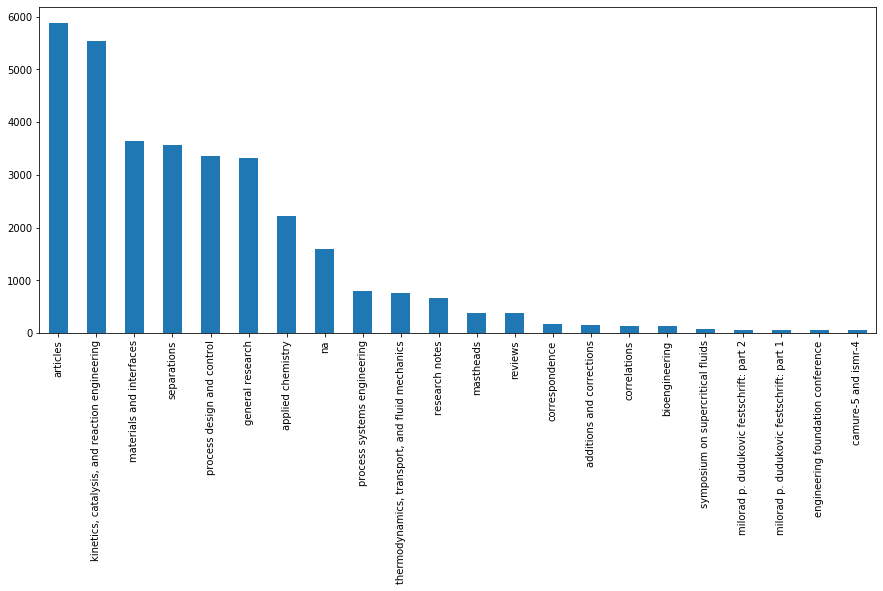

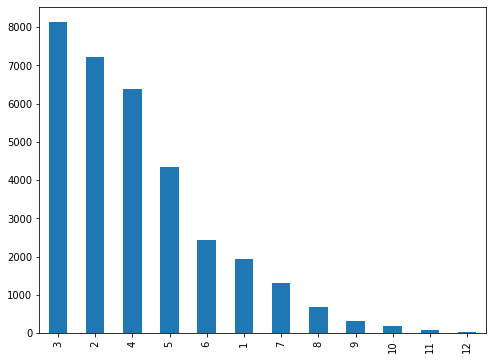

In [233]:
fig, axs = plt.subplots(1,1,figsize=(15, 6))
pd.value_counts(df['Category']).plot.bar()
plt.show()

fig, axs = plt.subplots(1,1,figsize=(8, 6))
pd.value_counts(df['#Authors'])[:12].plot.bar()
plt.show()

In [140]:
# art = soup.find('div',attrs={'class':"gs_ri"})
# cite = (art.findNext('div',attrs={'class':"gs_fl"}))
# if len(cite.text) > 3:
#     print(int((cite.text).split()[2]))
# else:
#     print(0)
# #     print(cite.findAll('a',href=True)[2]).text

In [107]:
driver = webdriver.Firefox()
citations = list()

for doi in df.DOI:
    url = 'https://pubs.acs.org/doi/' + doi 
#     print(url)
#     headers = {}
#     headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:50.0) Gecko/20100101 Firefox/50.0'
#     req = urllib.request.Request(url, headers=headers)
#     resp = urllib.request.urlopen(req)
#     content = resp.read()
    
    driver.get(url) #"https://pubs.acs.org/toc/iecred/28/10")
    content = driver.page_source
    soup = BeautifulSoup(content)
    art = soup.findAll('div',attrs={'class':"articleMetrics-val"})[2]
    cite = (art.text)
    
    citations.append(cite)

driver.close()
df['Citations'] = citations
df.to_csv('IECR_articles.csv', index=False, encoding='utf-8')

In [ ]:
# df = pd.read_csv('IECR_articles.csv')\
# df.Volume = df.apply(lambda x: int(x['Volume'].strip('<span class="issue-item_vol-num"> </')), axis=1)
# df.Issue = df.apply(lambda x: int(x['Issue'].strip('<span class="issue-item_issue-num"> </span')), axis=1)
# df.DOI = df.apply(lambda x: x['DOI'].strip('/doi/'),axis=1)
# df.Type = df.apply(lambda x: x['Type'].strip(' ( )'),axis=1)
# df.head()